In [1]:
import numpy as np
import pandas as pd

In [19]:
# 创建数组和标签
def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [48]:
# k-近临算法 numpy实现
def classify0(inX, dataSet, labels, k):
    """
    inX: 用于分类的输入向量
    dataSet: 输入的训练样本集
    labels: 标签向量
    k: 选择最近邻居的数目
    注意：labels元素数目和dataSet行数相同；程序使用欧式距离公式.
    """
    # 1. 实现欧式距离公式
    dataSetSize = dataSet.shape[0]
    # tile() 将inX进行复制，形成dataSetSize行和1列的数组
    # 目的是将inX数组跟样本数组的每一行相减
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    # 求平方
    sqdiffMat = pow(diffMat, 2)
    # 行向求和
    sqDistances = sqdiffMat.sum(axis=1)
    # 求平方根
    distances = np.sqrt(sqDistances)
    # 升序排序，返回的是排列后数组的序号形成的数组
    sortedDisIndicies = list(distances.argsort())
    # 2. 选择距离最小的k个点
    classCount = {}
    # 排序
    # classCount.get(voteIlabel, 0)是dict调用get方法，如果指定键的值不存在时，返回0
    # operator.itemgetter(i)定义一个函数，返回对象数组中序号为i的元素
    # classCount.items()将字典转换成元组，这里我换成lambda函数实现
    for i in range(k):
        voteIlabel = labels[sortedDisIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(),
                              key=lambda x: x[1], reverse=True)
    return sortedClassCount[0][0]

In [49]:
group, labels = createDataSet()

In [50]:
classify0([3,1], group, labels, 3)

'A'

导入数据

In [10]:
# 导入文本并解析 numpy 实现
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    # 获得文件中的数据行的行数
    numberOfLines = len(arrayOLines)
    # 生成全为0的3列空矩阵
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        # 清除每行的前后空格
        line  = line.strip()
        # 以tab为分割
        listFromLine = line.split('\t')
        # 每列的属性数据赋值到returnMat每一行
        returnMat[index, :] = listFromLine[0:3]
        # 提取最后一列的标签数据
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    # 返回数据矩阵returnMat和对应的类别classLabelVector
    return returnMat, classLabelVector

In [ ]:
file2matrix('datingTestSet2.txt')

In [3]:
# 导入文本并解析 pandas 实现
def read_file(filename):
    data = pd.read_table(filename, header=None, encoding='gb2312',
                     delim_whitespace=True)
    target = list(data[3].values)
    data = data.drop(3, axis = 1)
    return data, target

In [4]:
filename = 'datingTestSet2.txt'
datingDataMat, datingLabels = read_file(filename)

In [5]:
datingDataMat.head()

,0,1,2
0,40920,8.326976,0.953952
1,14488,7.153469,1.673904
2,26052,1.441871,0.805124
3,75136,13.147394,0.428964
4,38344,1.669788,0.134296


分析数据

In [6]:
import matplotlib as mb
import matplotlib.pyplot as plt

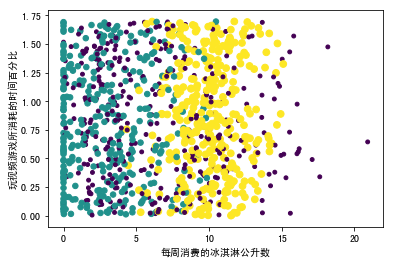

In [7]:
fig = plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] 
# "111" means "1x1 grid, first subplot", Alternative form for add_subplot(111) is add_subplot(1, 1, 1)
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[1], datingDataMat[2], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
ax.set_xlabel(u'每周消费的冰淇淋公升数')
ax.set_ylabel(u'玩视频游戏所消耗的时间百分比')
plt.show()

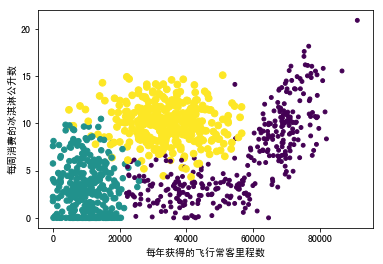

In [8]:
fig = plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] 
# "111" means "1x1 grid, first subplot", Alternative form for add_subplot(111) is add_subplot(1, 1, 1)
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[0], datingDataMat[1], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
ax.set_xlabel(u'每年获得的飞行常客里程数')
ax.set_ylabel(u'每周消费的冰淇淋公升数')
plt.show()

准备数据

In [9]:
# numpy 实现归一化
def autoNorm(dataset):
    """
    归一化特征值，消除属性之间量级不同导致的影响
    :param dataSet: 数据集
    :return: 归一化后的数据集normDataSet,ranges和minVals即最小值与范围，并没有用到
    归一化公式：
        Y = (X-Xmin)/(Xmax-Xmin)
        其中的 min 和 max 分别是数据集中的最小特征值和最大特征值。该函数可以自动将数字特征值转化为0到1的区间。
    """
    # 计算每种属性的最大值、最小值、范围
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 极差
    ranges = maxVals - minVals
    # -------第一种实现方式---start-------------------------
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    # 生成与最小值之差组成的矩阵
    normDataSet = dataSet - tile(minVals, (m, 1))
    # 将最小值之差除以范围组成矩阵
    normDataSet = normDataSet / tile(ranges, (m, 1))  # element wise divide
    # -------第一种实现方式---end---------------------------------------------
    
    # # -------第二种实现方式---start---------------------------------------
    # norm_dataset = (dataset - minvalue) / ranges
    # # -------第二种实现方式---end---------------------------------------------
    return normDataSet, ranges, minVals

In [41]:
# pandas 实现归一化
def autoNorm(dataset):
    minVals = dataset.min()
    maxVals = dataset.max()
    ranges = maxVals - minVals
    normDataSet = (dataset - minVals) / ranges
    return normDataSet, ranges, minVals

In [42]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [43]:
normMat.head()

,0,1,2
0,0.448325,0.398051,0.562334
1,0.158733,0.341955,0.987244
2,0.285429,0.068925,0.474496
3,0.823201,0.628480,0.252489
4,0.420102,0.079820,0.078578


测试算法：

In [51]:
# 测试算法numpy实现
def datingClassTest():
    """
    对约会网站的测试方法
    :return: 错误数
    """
    # 设置测试数据的的一个比例（训练数据集比例=1-hoRatio）
    hoRatio = 0.1
    # 从文件中加载数据
    filename = 'datingTestSet2.txt'
    datingDataMat, datingLabels = read_file(filename)
    # 归一化数据
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # m 表示数据的行数，即矩阵的第一维
    m = normMat.shape[0]
    # 设置测试的样本数量， numTestVecs:m表示训练样本的数量
    numTestVecs = int(m * hoRatio)
    print('numTestVecs=', numTestVecs)
    # 测试数据
    errorCount = 0.0
    for i in range(numTestVecs):
        # 载入k-近临算法
        classifierResult = classify0(list(normMat.iloc[i, :]), normMat.iloc[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))
    print(errorCount)

In [52]:
datingClassTest()

numTestVecs= 100
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 

约会网站预测函数

In [57]:
def classifyPerson():
    resultList = ['不喜欢', '感觉一般', '很有魅力']
    percentTats = float(input('玩视频游戏所耗时间百分比： '))
    ffMiles = float(input('每年获得的飞行里程数： '))
    iceCream = float(input('每周消费的冰淇淋公升数： '))
    filename = 'datingTestSet2.txt'
    datingDataMat, datingLabels = read_file(filename)
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = [ffMiles, percentTats, iceCream]
    classifierResult = classify0((inArr - minVals)/ranges, normMat, datingLabels, 3)
    print("你对他的好感度预测为：" + resultList[classifierResult - 1])

In [58]:
classifyPerson()

玩视频游戏所耗时间百分比： 10
每年获得的飞行里程数： 10000
每周消费的冰淇淋公升数： 0.5
你对他的好感度预测为：感觉一般
